# Регулризация

Регуляризация - это способ борьбы с таким явлением как "переобучение".

Пример оверфиттинга проще всего привести в виде картинки. Пусть вы решаете задачу классификации на два класса ( о которой уже знаете с первых уроков этого курса)
* сначала модель, которая обучена не совсем хорошо (underfit) - разделяющая линия прямая и много "красных" точек неправильно классифицированы
* затем хорошо обученная модель (normal) - есть какой-то баланс
* переобученная модель (overfit) - разделяющая линия слишком сильно "облизывает" обучающие данные.
 
![overfit_example](https://248006.selcdn.ru/public/Data-science-3/img/overfit_example.png)

Чем же плохо переобучение? Когда в модель придут "новые" точки, то качество модели будет низким, потому что модель слишком сильно подогналась под обучающие данные. В этом случае говорят, что падает "обобщающая способность" - модель не получается обощить на новые данные.

**Как бороться с переобучением линейной регрессии?** Нам надо как-то "наказать" модель за то, что она слишком сильно подгоняется под обучающую выборку. Это можно сделать помощью регуляризации! Регуляризация - это специальная модификация модели линейной регрессии. В стандартной библиотеки sklearn есть два класса, в которых реализована регуляризация:
* sklearn.linear_model.Ridge, ссылка на доку https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
* sklearn.linear_model.Lasso, ссылка на доку https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Lasso.html

Чем отличаются эти два класса мы узнаем в следующих уроках этого модуля. Мы уже знакомы с классом `sklearn.linear_model.LinearRegression`, с который вообще не требует никаких параметров при создании, а вот классы `Ridge` и `Lasso` принимают на вход т.н. параметр регуляризации *alpha*, который принимает значения от $0$ до $1$ - чем ближе к единице, тем регуляризация сильнее, тем сильнее наказываем модель за сильную "подгонку" под обучающие данные.

## Формулы

Как регуляризация появляется в формулах?

Мы уже умеем определять, что модель переобучилась - нужно обучать на тренировочном сете, а метрику качества считать на валидационном.


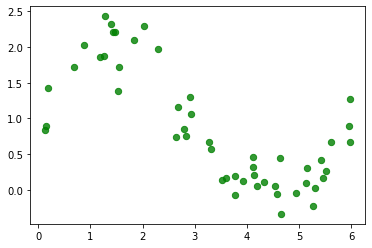

In [12]:
import matplotlib.pyplot as plt

# основной график
plt.scatter(data.x_train, data.y_train, 40, 'g', 'o', alpha=0.8)
plt.show()

Обучим полиномиальную регрессию для разных степеней полинома. Мы уже знаем, что для полиномиальной модели порядка $n$ в матрицу фичей $X$ добавляются степени фичей (например, в случае обучения регрессии на единственной фиче модуль приобретёт вид $y = w_0 + w_1x +w_2x^2 + \ldots + w_nx^n$).

Кроме прочей информации будем вычислять т.н. *норму вектора* - это просто корень из суммы квадратов коэффициентов линейной регрессии. Чтобы избавиться от корня, будем вычислять квадрат нормы, обозначается как $\|w\|^2$.

* https://www.youtube.com/watch?time_continue=1&v=b0dgsaYbOVI
* https://www.youtube.com/watch?time_continue=262&v=05j0DOCRnjI
* [Статья про норму вектора на википедии](https://ru.wikipedia.org/wiki/Норма_(математика))

Норма вектора обозначется двумя вертикальными линиями:
$$
\|w\|^2 = w_1^2+\ldots+w_n^2
$$

Для вычисления этой метрики используем [функцию norm из numpy](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.linalg.norm.html).

In [13]:
from sklearn.linear_model import LinearRegression
from numpy.linalg import norm
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split


def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

def train_polynomial(degree, data):
    """Генерим данные, тренируем модель  
    дополнительно рисуем график
    """
    X = generate_degrees(data['x_train'], degree)
    y = data.y_train.values
    X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
    model = LinearRegression().fit(X_train, y_train)
    y_pred = model.predict(X_valid)
    y_pred_train = model.predict(X_train)
    error_valid = mean_squared_error(y_valid, y_pred)
    error_train = mean_squared_error(y_train, y_pred_train)
    print(
        "Степень полинома %d\nОшибка на валидации %.3f\nОшибка на обучении %.3f" %
        (degree, error_valid, error_train)
    )
    order_test = np.argsort(X_valid[:,0])
    plt.scatter(X_valid[:,0][order_test], y_valid[order_test], 40, 'r', 'o', alpha=0.8)
    print("Норма вектора весов \t||w|| = %.2f" % (norm(model.coef_)))
    # визуализируем решение
    x_linspace = np.linspace(data['x_train'].min(), data['x_train'].max(), num=100)
    y_linspace = model.predict(generate_degrees(x_linspace, degree))
    plt.plot(x_linspace, y_linspace)
    return error_valid, error_train, norm(model.coef_)

degrees = []
valid_errors = []
train_errors = []
w_norm = []

Степень полинома 3
Ошибка на валидации 0.051
Ошибка на обучении 0.077
Норма вектора весов 	||w|| = 2.19


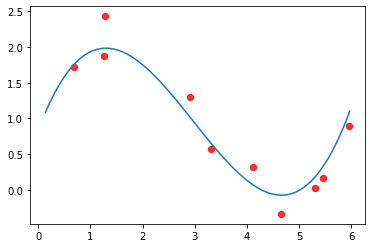

In [14]:
degree = 3

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 5
Ошибка на валидации 0.063
Ошибка на обучении 0.069
Норма вектора весов 	||w|| = 3.31


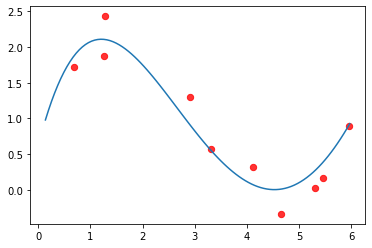

In [15]:
degree = 5

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

Степень полинома 10
Ошибка на валидации 0.122
Ошибка на обучении 0.052
Норма вектора весов 	||w|| = 120.14


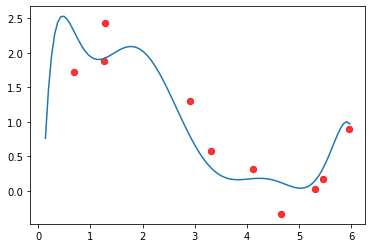

In [16]:
degree = 10

error_valid, error_train, coef_norm = train_polynomial(degree, data)

degrees.append(degree)
valid_errors.append(error_valid)
train_errors.append(error_train)
w_norm.append(coef_norm)

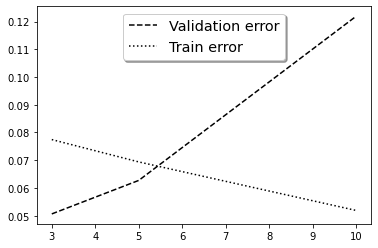

In [17]:
from matplotlib import pyplot
%matplotlib inline

fig, ax = plt.subplots()
ax.plot(degrees, valid_errors, 'k--', label='Validation error')
ax.plot(degrees, train_errors, 'k:', label='Train error')

legend = ax.legend(loc='upper center', shadow=True, fontsize='x-large')

plt.show()

На графике можно заметить, как с ростом степени полинома ошибка на валидации начинает расти, а на обучении, наоборот, падать. Одновременно с ухудшением качества модели на валидации можно заметить, как растёт норма вектора коэффициентов $w$ -  от значения $2.19$ до значения $120.14$, то есть большие по модулю величины коэффициентов свидетельствуют о том, что модель переобучается. 

Мы хотели узнать, в какой точке модель будет получается сбалансированной и не "оверфиттится". Эта точка - там, где две линии ошибок пересекаются. В этой точке, которая соответствует степени полинома *degree=5*, модель достаточно хороша на обучении и не слишком плоха на валидации.

Мы подобрались к главному вопросу этого модуля: почему случается переобучение с точки зрения математики? Вспомним, что мы получаем предсказания модели, используя коэффициенты регрессии, в виде

$$
\hat{y} = w_0x_0 + \ldots w_nx_n
$$

По этой формуле видно, что величина коэффициентов $w$ по модулю сильно влияет на предсказания - чем больше коэффициенты линейной регрессии $w=[w_1,\ldots,w_n]$, тем больше таргет $y$ при одинаковом значении $x$, зависимость линейная.

Вспомним, что аналитическая формула для нахождения коэффициентов регрессии выглядит вот так 
$$
\overline{w} = \left(X^TX\right)^{-1}X^TY
$$

Такое решение получается, когда мы минимизируем функцию ошибок ($N$ - число обучающих примеров):

$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2
$$

В эксперименте с полиномиальной регрессией мы выяснили простое правило - чем больше квадраты коэффициентов регрессии, тем хуже качество. Как же нам заставить модель делать коэффициенты поменьше, чтобы качество не страдало?

Самое простое решение, которое приходит на ум - каким-то образом "наказывать" нашу модель за слишком большие значения коэффициентов линейной регрессии $w$. Давайте добавим в функцию качества модели $L(y, w)$ дополнительное слагаемое, которое содержит квадрат нормы вектора весов $\|w\|^2$:

$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \sum_{i=1}^{k}w_i^2 = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \|w\|^2
$$

С помощью этого трюка мы минимизируем функцию $L(x,w)$ как бы в двух направлениях:
* уменьшаем ошибку $y-\hat{y}$ (первый компонент формулы)
* следим за нормой коэффициентов регрессии $\|w\|^2$ - модель вынуждена делать коэффициенты как можно меньшими, потому что их размер влияет на функцию ошибки $L(x,w)$

Эксперимент показал: чем больше $\|w\|^2$, тем сильнее переобучение. Следовательно, сделав коэффициенты более маленькими, мы уменьшим переобучение!

Такой процесс добавления слегаемых в целевую функцию называется *регуляризацией*. Регуляризация - это наложение дополнительных ограничений на целевую функцию $L(y, w)$. Добавляя в функцию качества $L$ сумму квадратов коэффициентов регрессии мы "принуждаем" нашу модель к тому, чтобы веса $w=[w_1,\ldots,w_k]$ были как можно более меньшими по модулю. Вернёмся к формуле целевой функции регуляризованной линейной регрессии:
$$
L(y,w) = \sum_{i=1}^{N}\left(y_i - \hat{y_i}\right)^2 + \alpha \cdot \|w\|^2
$$

В этой формуле
* $\alpha$ - параметр регуляризации. Он принимает значения от $0$ до $1$: чем ближе к $1$ - тем сильнее регуляризация, тем сильнее уменьшаются веса линейной регрессии
* квадрат нормы коэффициентов линейной регрессии: $\|w\|^2 = \sum_{i=1}^{k}w_i^2$

# Подготовка

## Импорт библиотек

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error

## Загрузка данных

In [19]:
data = pd.read_csv('non_linear.csv', sep=',')
data.head()

,x_train,y_train
0,0.138368,0.838812
1,0.157237,0.889313
2,0.188684,1.430040
3,0.685553,1.717309
4,0.874237,2.032588


# Ridge

In [20]:
def generate_degrees(source_data: list, degree: int):
    """Функция, которая принимает на вход одномерный массив, а возвращает n-мерный
    Для каждой степени от 1 до  degree возводим x в эту степень
    """
    return np.array([
          source_data**n for n in range(1, degree + 1)  
    ]).T

In [21]:
degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.125
Качество на обучении: 0.051


In [22]:
degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)
model = Ridge(alpha=0.01).fit(X_train, y_train)
y_pred = model.predict(X_valid)
y_pred_train = model.predict(X_train)
print("Качество на валидации: %.3f" % mean_squared_error(y_valid, y_pred))
print("Качество на обучении: %.3f" % mean_squared_error(y_train, y_pred_train))

Качество на валидации: 0.077
Качество на обучении: 0.058


/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=5.80566e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


# Lasso

In [33]:
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

model = Lasso(alpha=0.01).fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_valid)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("MAE на валидации: %.3f" % mae)
print("MAE на обучении: %.3f\n" % mae_train)
print("MSE на валидации: %.3f" % mse)
print("MSE на обучении: %.3f\n" % mse_train)
print("R2 на валидации: %.3f" % r2)
print("R2 на обучении: %.3f" % r2_train)

MAE на валидации: 0.196
MAE на обучении: 0.239

MSE на валидации: 0.063
MSE на обучении: 0.086

R2 на валидации: 0.915
R2 на обучении: 0.859


/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.392e+00, tolerance: 2.448e-03
  model = cd_fast.enet_coordinate_descent(


In [42]:
from sklearn.linear_model import LassoCV
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

degree = 12
X = generate_degrees(data['x_train'], degree)
y = data.y_train.values
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=10)

model = LassoCV(cv=5).fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred = model.predict(X_valid)

mae_train = mean_absolute_error(y_train, y_pred_train)
mse_train = mean_squared_error(y_train, y_pred_train)
r2_train = r2_score(y_train, y_pred_train)

mae = mean_absolute_error(y_valid, y_pred)
mse = mean_squared_error(y_valid, y_pred)
r2 = r2_score(y_valid, y_pred)

print("MAE на валидации: %.3f" % mae)
print("MAE на обучении: %.3f\n" % mae_train)
print("MSE на валидации: %.3f" % mse)
print("MSE на обучении: %.3f\n" % mse_train)
print("R2 на валидации: %.3f" % r2)
print("R2 на обучении: %.3f" % r2_train)

MAE на валидации: 0.574
MAE на обучении: 0.579

MSE на валидации: 0.501
MSE на обучении: 0.475

R2 на валидации: 0.323
R2 на обучении: 0.224


/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.003491819816066055, tolerance: 0.001901160628308103
  model = cd_fast.enet_coordinate_descent_gram(
/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00602819479609451, tolerance: 0.001901160628308103
  model = cd_fast.enet_coordinate_descent_gram(
/home/roman/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:633: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00708945913883241, tolerance: 0.001901160628308103
  model = cd_fast.enet_coordinate_descent_gram(
/home/roman/anaconda3/lib/python3.9/site-packages/sklearn